## Einführung in MicroPython
Ohne Weiteres kann Jupyter Notebook nicht zur Ausführung von Micropython-Code genutzt werden. 
Sie müssen daher die Code-Snippets in den Editor Ihrer Wahl kopieren 
Mögliche Editoren: 
- Thonny (lightweight, einfache Auswahl Interpreter, einfacher Zugriff auf repl)
- Arduino Lab for MicroPython (lightweight)
- VS Code + Pymakr-Extension (umständliche Installation)

(theoretisch ist es möglich, jupyter notebooks zu nutzen: https://github.com/goatchurchprime/jupyter_micropython_kernel)


### Installation Micropython
Inbetriebnahme des Mikroprozessors über Arduino IDE
Erase_flash
Write_flash
1st blink test

- esptool –port COM12 erase_flash
- esptool --port COM12 --baud 460800 write_flash --flash_size=detect 0 *PFAD auf .bin-Datei der Firmware* 
    - https://micropython.org/download/ESP8266_GENERIC/
- reboot
- Test der Installation mit repl: 
    - python -m serial.tools.miniterm COM12 115200 (vorher pip install serial) 
    - alternativ mpremote connect COM12 (vorher pip install mpremote)



**Blink Test**

- Sprechen Sie die interne LED an. Beim ESP8266 ist diese Pin 2
- Notwendig ist dazu der Import von Machine. Darüber hinaus müssen sie den Pin als Output-Pin definieren
- den Wert der LED definieren Sie mit .on()/.off() oder .value(0)/.value(1)


In [3]:
# internal led test
from machine import Pin
import time

builtinLed = Pin(2, Pin.OUT)

for ix in range(5):
    builtinLed.value(0)
    print('boot blinki blinki ',ix,' from 5')
    time.sleep(0.2)
    builtinLed.value(1)
    time.sleep(0.2)

ModuleNotFoundError: No module named 'machine'

**Externe Led**
- Sprechen Sie über einen der GPIOs eine externe Led an. Strom ~20mA, Vorwärtsspannung LED ~2V
- Ansonsten analog zu interner Led
- Testen Sie mit dem Packet time (time.sleep(1) = 1 sekunde delay), wie Sie die Leds zum blinken bringen können
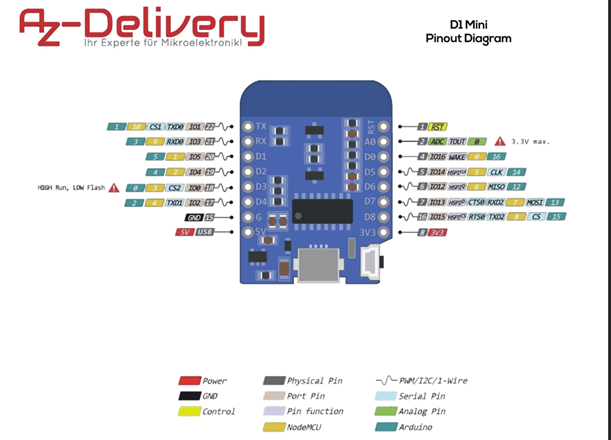

In [2]:
# external led test
from machine import Pin
import time

builtinLed = Pin(2, Pin.OUT)
ledD1=Pin(5,Pin.OUT)#D1

for ix in range(10):
    builtinLed.value(0)
    ledD1.on()
    print('loopy luiii')
    time.sleep(0.5)
    ledD1.off()
    builtinLed.value(1)
    time.sleep(0.3)

ModuleNotFoundError: No module named 'machine'

**Button ohne externer Widerstand**

- Verbauen Sie einen Pull-up-Botton (value()==0 wenn gedrückt) ohne externen Widerstand, der durch Drücken eine Led aktiviert und einen print ausführt
- button = Pin(12,Pin.IN,Pin.PULL_UP)


In [ ]:
# pull_up botton using internal resistance
from machine import Pin
from time import sleep

ledD1=Pin(5,Pin.OUT)#D1
buttonIntResistance = Pin(12, Pin.IN,Pin.PULL_UP)#D6 12
while True:
    if buttonIntResistance.value() == 0:     # if button pressed
      print('button1 gedrückt')
      ledD1.value(1)             # led will turn ON
    if buttonIntResistance.value() == 1:                        # if push_button not pressed
      print('button1 nicht gedrückt')
      ledD1.value(0)             # led will turn OFF
    print('---')
    sleep(2)

**Button mit externem Widerstand**

- kombinieren Sie den obigen Button mit einem weiteren Button, der über einen externen Widerstand verfügt (Vorteil externer Widerstand: präziser, höhere Qualität) sowie mit einer zusätzlichen Led --> button 1 steuert Led 1, button 2 steuert Led 2
- 10kOhm Widerstand
- button = Pin(12,Pin.IN) --> ohne Pin.PULL_UP 

In [ ]:
# 2 leds activated by 2 buttons
from machine import Pin
from time import sleep

ledD1=Pin(5,Pin.OUT)#D1
ledD2=Pin(4,Pin.OUT)#D2

buttonIntResistance = Pin(12, Pin.IN,Pin.PULL_UP)#D6 12
buttonExtResistance= Pin(14, Pin.IN)#D5 14 # Pull_down
while True:
    if buttonIntResistance.value() == 0:     # if button pressed
      print('button1 gedrückt')
      ledD1.value(1)             # led will turn ON
    if buttonIntResistance.value() == 1:                        # if push_button not pressed
      print('button1 nicht gedrückt')
      ledD1.value(0)             # led will turn OFF
    if buttonExtResistance.value() == 1:                        # if push_button not pressed
      print('button2 nicht gedrückt')
      ledD2.value(0)             # led OFF
    if buttonExtResistance.value() == 0:                        # if push_button pressed
      print('button2 gedrückt')
      ledD2.value(1)             # led will turn OFF

    print('---')
    sleep(2)

**Temperatursensor**

- führen Sie eine mehrfache Messung mit dem Sensor DS18X20 durch und printen Sie die Werte
  
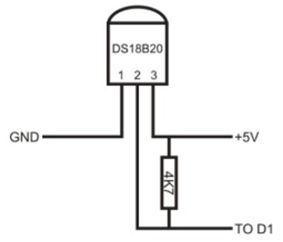
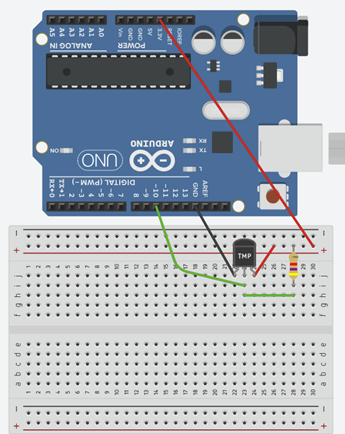

In [5]:
# read temperature sensors
# take care, the sensors need a 4.7 kOhm resistor!
# although the drawing suggests 5V, 3.3V also works
from machine import Pin
import time
from onewire import OneWire
#OneWire is a serial communication protocol that allows data exchange between a master (=ESP32 or 8266) and one or more slave 
#devices using just one data wire (plus ground) --> concatenate multiple sensors
from ds18x20 import DS18X20 # the package for this specific temperature sensor
import onewire, ds18x20

# The temp sensor is connected at Pin17 (D8)
tempSensorPin = Pin(17)

# calling the sensor without the import of DS18X20 (only ds18x20 as generic package)
# these 3 lines of code are not necessary for the loop below and only show an alternative way of calling the sensor
ds_sensor = ds18x20.DS18X20(onewire.OneWire(tempSensorPin))
roms = ds_sensor.scan()
print('Found DS devices: ', roms)

# Create OneWire instance -> wiring now knows which pin to connect to
dq_ow = OneWire(tempSensorPin)

# Create DS18x20 instance -> now the esp knows, that behind the wiring we have an instance of DS18X20, e.g. a temp sensor
ds = DS18X20(dq_ow)
# this script was designed for esp32, not esp8266, adapt pin!
internalLed = Pin(48, Pin.OUT)  # GPIO2
led2=Pin(1, Pin.OUT) 

# Scan the ds18b20 devices on the single bus and return a list of device addresses (--> if there are multiple connected)
ds_addresses = ds.scan() 

for idx in range(5):
    #Obtain temperature sampling for convert temperature unit conversion.
    ds.convert_temp()
    internalLed.on()
    led2.on()# Turn LED on  
    time.sleep(1)
    
    print('in loop: ',idx)
    for ds_address in ds_addresses:
        # Print temperature of all devices
        print('Die Temperatur am Sensor '+str(bytes(ds_address)) + ' beträgt: ' + str(ds.read_temp(ds_address))+' °C')
    internalLed.off()
    led2.off()# Turn LED off
    time.sleep(1)

led2.on()
internalLed.off()
print('end of file')

ModuleNotFoundError: No module named 'machine'

**boot und main**

- führen Sie zwei der oben erprobten Led-Skripte als boot.py und main.py auf dem Mikroprozessor aus 